# Training

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
%run lib2 --area_id=3 --bs=80 --num_workers=8 --num_slice=9 --gpu_start=2 --num_gpus=2

In [3]:
trn_csv = pd.read_csv(PATH/DATA_PATH/FMT_VALTRAIN_FN)
val_csv = pd.read_csv(PATH/DATA_PATH/FMT_VALTEST_FN)
trn_image_ids = trn_csv['ImageId'].tolist()
val_image_ids = val_csv['ImageId'].tolist()

trn_y = load_y(trn_image_ids, FMT_VALTRAIN_MASK_STORE)
val_y = load_y(val_image_ids, FMT_VALTEST_MASK_STORE)

trn_names = [str(o) + '.png' for o in trn_image_ids]
val_names = [str(o) + '.png' for o in val_image_ids]

In [4]:
def get_tfms():
    stats = get_rgb_mean_stat(area_id)
    aug_tfms = transforms_top_down
    for o in aug_tfms: o.tfm_y = TfmType.CLASS
    tfms = tfms_from_stats(stats, sz, crop_type=CropType.NO, tfm_y=TfmType.CLASS, aug_tfms=aug_tfms)
    return tfms

In [5]:
tfms = get_tfms()

trn = (trn_names, trn_y)
val = (val_names, val_y)
test = None

datasets = ImageData.get_ds(OptionalFilesArrayDataset, trn, val, tfms,
                            test=test, path=PATH/DATA_PATH/TRN, num_slice=num_slice, pad=False)
md = ImageData(str(PATH), datasets, bs, num_workers=num_workers, classes=None)

denorm = md.trn_ds.denorm

In [6]:
model = get_model()

In [7]:
learn = get_learn(md, model, load_weight=False)

# Got learn

In [8]:
learn.freeze_to(1)

  8%|▊         | 6/73 [00:09<01:42,  1.54s/it, loss=3.19] 


Exception in thread Thread-6:
Traceback (most recent call last):
  File "/home/twofyw/miniconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/twofyw/miniconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_monitor.py", line 62, in run
    for instance in self.tqdm_cls._instances:
  File "/home/twofyw/miniconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



 68%|██████▊   | 50/73 [01:00<00:27,  1.22s/it, loss=20.1]
CPU times: user 7min 54s, sys: 10min 40s, total: 18min 34s
Wall time: 1min 1s


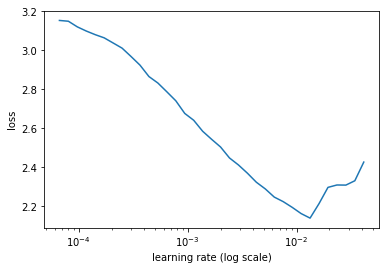

In [12]:
%%time
learn.lr_find()
learn.sched.plot()

In [7]:
#learn.load('unet-5')

In [9]:
lr=2e-3
wd=1e-7
lrs = np.array([lr/3,lr])

In [10]:
%%time
learn.fit(lrs,1, wds=wd, cycle_len=2, use_wd_sched=True, use_clr=(20,8), best_save_name=weight_load)

epoch      trn_loss   val_loss   mask_acc   jaccard_coef_par 
    0      1.072942   0.718835   0.954208   0.55362   
    1      0.898161   0.665759   0.956033   0.577964       

CPU times: user 35min 54s, sys: 30min, total: 1h 5min 55s
Wall time: 3min 28s


[array([0.66576]), 0.956033109370829, 0.577964197471086]

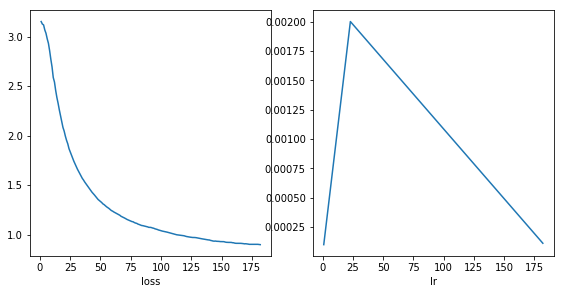

In [11]:
plot_lr_loss(learn)

In [ ]:
learn.unfreeze()

In [12]:
%%time
learn.fit(lrs,1, wds=wd, cycle_len=4, use_wd_sched=True, use_clr=(20,8), best_save_name=weight_load)

epoch      trn_loss   val_loss   mask_acc   jaccard_coef_par 
    0      0.843172   0.664237   0.95441    0.578313  
    1      0.793519   0.601016   0.960279   0.607603       
    2      0.755146   0.588646   0.960734   0.615125       
    3      0.730583   0.543262   0.966564   0.636338       

CPU times: user 1h 6min 37s, sys: 58min 57s, total: 2h 5min 35s
Wall time: 6min 26s


[array([0.54326]), 0.9665635545856519, 0.6363378283583158]

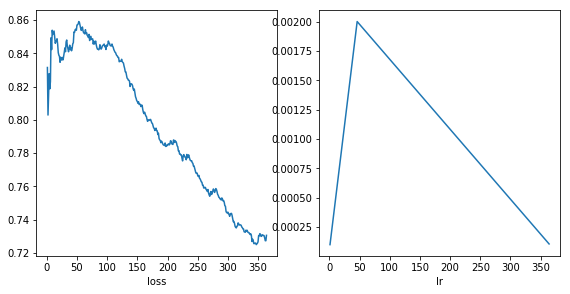

In [13]:
plot_lr_loss(learn)

In [18]:
learn.save('vegas.final-2')

In [14]:
learn.unfreeze()

In [15]:
lrs /= 4

In [20]:
learn.fit(lrs,1, wds=wd, cycle_len=8, use_wd_sched=True, use_clr=(20,8), best_save_name=weight_load)

epoch      trn_loss   val_loss   mask_acc   jaccard_coef_par 
    0      0.657557   0.57657    0.926084   0.682125  
    1      0.655878   0.574612   0.927006   0.683032         
    2      0.657117   0.583736   0.922822   0.680127         
    3      0.660203   0.578043   0.924992   0.6826           
    4      0.653601   0.572992   0.926326   0.684439         
    5      0.652156   0.574367   0.925746   0.683661         
    6      0.653104   0.568597   0.927691   0.685727         
    7      0.649281   0.572128   0.926312   0.684678         



[array([0.57213]), 0.9263116095167818, 0.6846779966632593]

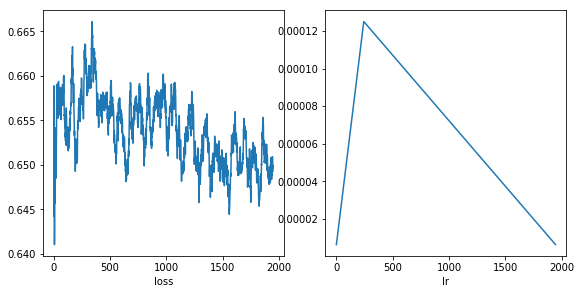

In [21]:
plot_lr_loss(learn)

In [22]:
learn.save('vegas.final-1')

In [23]:
learn.fit(lrs,1, wds=wd, cycle_len=8, use_wd_sched=True, use_clr=(20,8), best_save_name=weight_load)

epoch      trn_loss   val_loss   mask_acc   jaccard_coef_par 
    0      0.655238   0.577888   0.924849   0.681874  
    1      0.656954   0.583832   0.923332   0.6804           
    2      0.646528   0.57485    0.92532    0.683642         
    3      0.646908   0.562661   0.929008   0.687954         
    4      0.649948   0.577089   0.92452    0.682955         
    5      0.656291   0.565106   0.927741   0.688045         
    6      0.648108   0.567116   0.927259   0.686734         
    7      0.64639    0.566421   0.927143   0.687192         



[array([0.56642]), 0.9271426828766456, 0.6871921828199316]

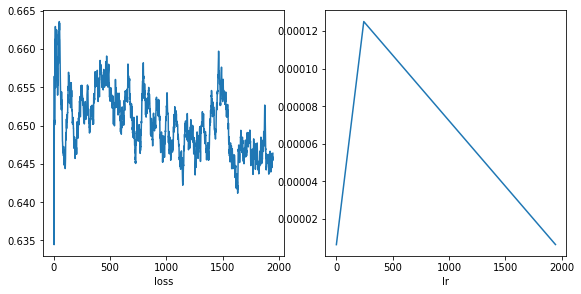

In [24]:
plot_lr_loss(learn)